<a target="_blank" href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/04%20-%20Visualization/Walkthrough_4.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
#@title Data Visualization - Lab 4

%%html

<div>
<td> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

>The goal of this week's walkthrough is to introduce you to visualization tools and to teach you how to present and interpret data in graphical formats. In essence, Data Visualiation can be thought of as whole science looking at the numerous ways and choices one has to represent Data. Therefore, we will also show you some typical examples of visualization for proper representation or analysis of a given problem. 
>
> In the first part of this walkthrough, you will likely encounter visualization used in the last lab session along some new ones.
>
> Then in a second part, we will go a bit further and show you how to build interactive visualizations. 

##Imports and data set
>First, let's import the various librairies we'll need throughout the walkthrough.
>
>We will use [matplotlib](https://matplotlib.org/stable/index.html) a librairy for plotting and [seaborn](https://seaborn.pydata.org) a package for statistical data visualization.

In [ ]:
#Library imports 
import pandas as pd #nothing new here
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

>Today, we will use the **credit.csv** data set, wich contains personal and economical information of credit card owners.

In [ ]:
url = 'https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/Credit.csv'
data = pd.read_csv(url)
data.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


>As you probably wondered, it is not very helpfull nor usefull to have an "Unnamed: 0" column. Lets rename it and use it as index.

In [ ]:
data = data.rename( columns = {'Unnamed: 0' : 'CustomerID' })
#data = data.set_index('CustomerID')
data.head()

,CustomerID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
data.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


>As mentioned in previous labs, it is always important to check the types of each data entry in case of later of processings. We can start by getting an overview of our data set to be sure to what to expect.

In [ ]:
#get information from data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


>Now, let's begin with the visualization. During the course of this lab, we will always apply the major guidlines for successful visualization presented in the course.
>
>As a refresher : 
1. Keep It Simple
2. Design and choose the visualization well
3. Know your audience, tell a story
4. Have graphical integrity

#Static Visualizations

##Boxplots

>These kinds of charts are a must when you need a statistical overview of numerical data. In a boxplot, we can see: 
>
>- Mean
- Median
- Quartiles (1st and 3rd)
- Minimum
- Maximum
- Outliers
>
>For instance, imagine we were to investigate the **income distribution**. Having information on the Income satistics can be of major help in identifying the outliers. 

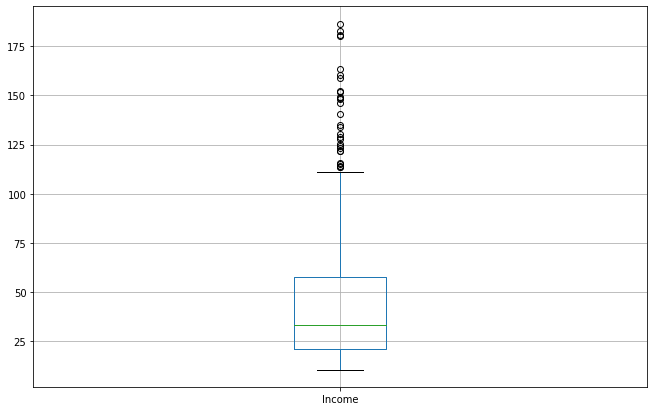

In [ ]:
#using figure size to increase the window
fig=plt.figure(figsize=(11,7))
box_plot=data.boxplot(column='Income')

##Bar plot/ Histogram

>Now let's say we were to investigate the proportion of credit card holder per gender. Using a bar chart of each gender is a good way to gain rapid insights on this customer proportion. 


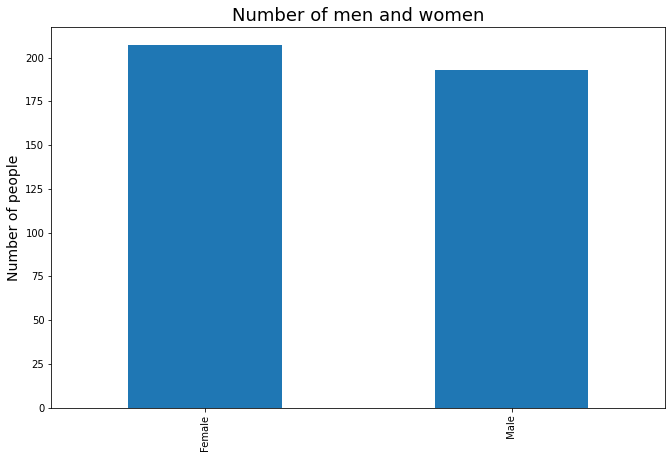

In [ ]:
data_bar = data['Gender'].value_counts()
fig=plt.figure(figsize=(11,7))

graph = data_bar.plot(kind= 'bar')

# It is possible to ad many details to a graph by using simple commands. eg.
graph.set_title('Number of men and women', size=18)
graph.set_xlabel('')
txt=graph.set_ylabel('Number of people', size=14)


>It's possible to do it horizontally too by setting the kind of bar plot to `barh`.

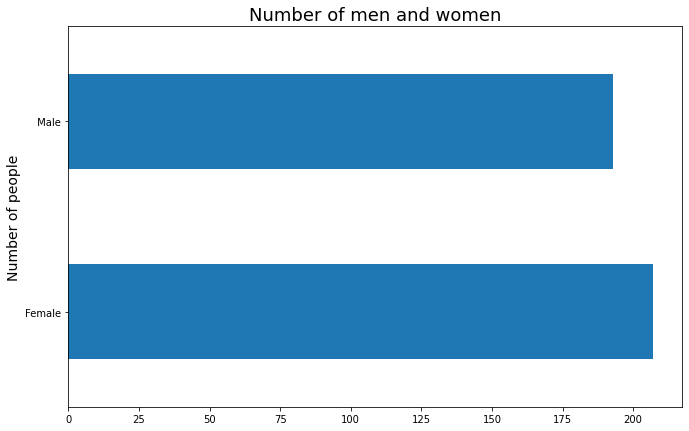

In [ ]:
fig=plt.figure(figsize=(11,7))

data_bar = data['Gender'].value_counts()
graph = data_bar.plot(kind= 'barh')
graph.set_title('Number of men and women', size=18)
graph.set_xlabel('')
txt=graph.set_ylabel('Number of people', size=14)

###**Exercise 1**
>Now it's your turn ! Create a barplot so that we can see the proportion of married student. 
>
>Be sure, to name your graph and the axes.

In [ ]:
#CODE HERE 

>Lastly, you have to keep in mind that granularity (how much datas are being shown on the graph) plays an important role in visualization.
Here, let's take the example of the distribution of Income depending on Age.

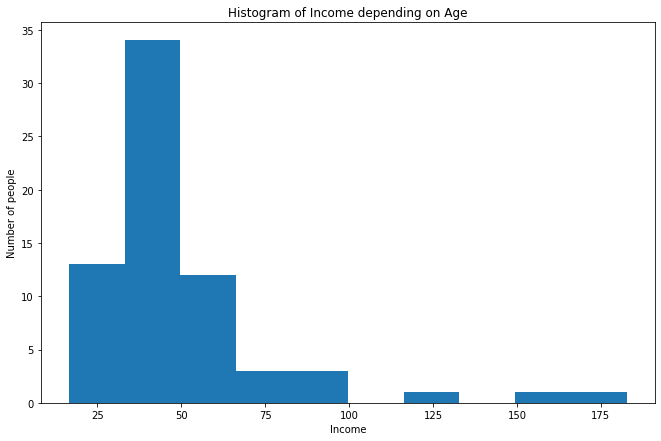

In [ ]:
fig=plt.figure(figsize=(11,7))

hist = plt.hist(data.groupby('Age')['Income'].mean())
plt.title("Histogram of Income depending on Age")
plt.xlabel("Income")
y =plt.ylabel("Number of people")

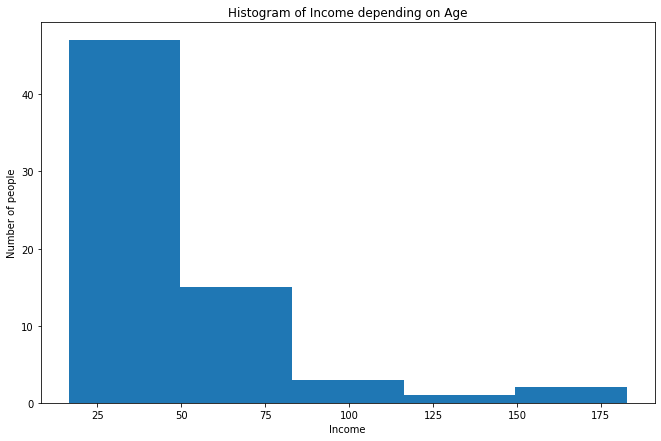

In [ ]:
fig=plt.figure(figsize=(11,7))

hist_2=plt.hist(data.groupby('Age')['Income'].mean(), bins=5)
plt.title("Histogram of Income depending on Age")
plt.xlabel("Income")
y =plt.ylabel("Number of people")

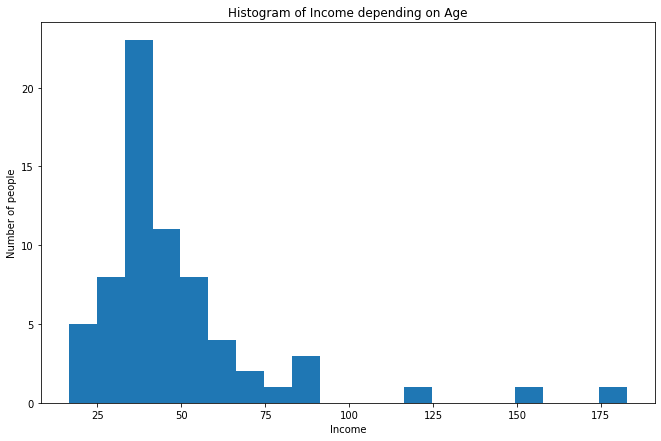

In [ ]:
fig=plt.figure(figsize=(11,7))

hist_3= plt.hist(data.groupby('Age')['Income'].mean(), bins=20)
plt.title("Histogram of Income depending on Age")
plt.xlabel("Income")
y =plt.ylabel("Number of people")

>Is there another kind of chart that come to your mind when thinking about how to visualize data propotion ?

##Pie chart
>Let's have a look at the proportion men and women of customer in the customer base.


Text(0.5, 1.0, 'Proportion of customer that are students')

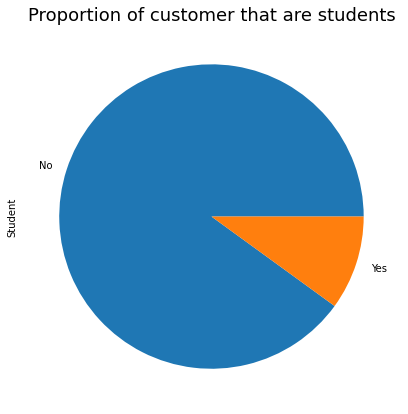

In [ ]:
data_pie = data['Student'].value_counts()
fig=plt.figure(figsize=(11,7))

graph = data_pie.plot(kind = 'pie') #you can ad as much parameters as you wish
graph.set_title("Proportion of customer that are students", size=18)

###**Exercise 2**
>Try to create a pie chart giving the proportion of customer with a partner. Percentage should be indicated on the chart and rounded at 2 digit, for this you can use **autopct**='%.x'
>
>**autopct** enables you to display the percent value rounded to the rounding you wish

In [ ]:
#CODE HERE 

##Scatter plot and Lines plot

###1. Lines plot

>Now moving on to linear representations, Lines plot are used to represent evolution of a value in function of another variable. For this example, we want to represent the evolution of Income with respect to the age.

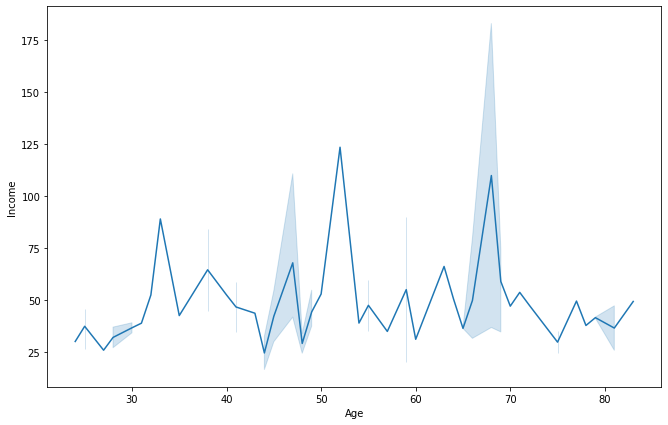

In [ ]:
fig=plt.figure(figsize=(11,7))
sb = sns.lineplot(x=data['Age'], y=data.groupby('Age')['Income'].mean())

###2. Scatter plot

>This kind of charts is very useful to visualize correlation between inputs. Let's check if device maximum debit limit is correlated with Monthly charges.
>
>You can plot a regression line by using the command **plt.plot**

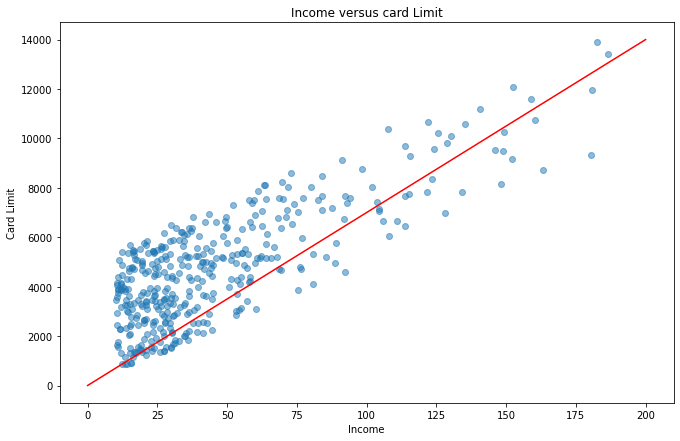

In [ ]:
fig=plt.figure(figsize=(11,7))
plt.scatter(data['Income'], data['Limit'], alpha=(1/2))
plot=plt.plot([0,200], [0,14000], color='red')
plt.title("Income versus card Limit")
plt.xlabel("Income")
y =plt.ylabel("Card Limit")

##HeatMaps

>Heatmaps enable you to visualize very easily the pearsons coefficiant of correlation with an apropriate color map weach can be changed depending on user's preference. 
>
>Let's try to create a heatmap of **correlations** of columns 'Limit', 'Income','Age' and 'Rating'. 


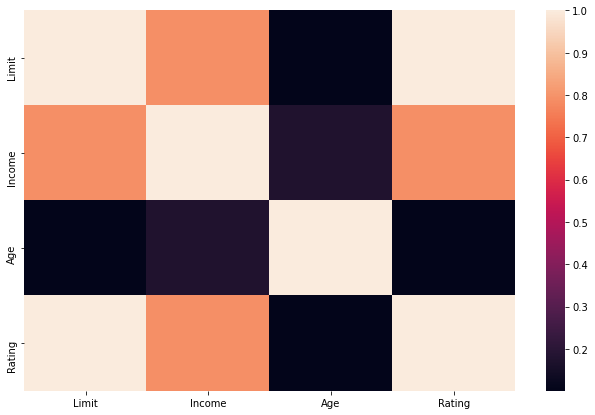

In [ ]:
fig=plt.figure(figsize=(11,7))

heat_map = data[['Limit','Income', 'Age', 'Rating']].corr() #We must ad .corr() here as we are looking for the correlations between our variables.
sb= sns.heatmap(data = heat_map)

>Which variables are the least correlated ?

### **Exercise 3**
Like with every other data visualization tool, you can improve its look so that it's easier to read and understand.

With the same heatmap try modifying it so that it is easier to read, use this [link](https://likegeeks.com/seaborn-heatmap-tutorial/) to find out how to easily do so.

In [ ]:
#Code here 

#Interactive Visualization

## Ipywidgets
>In this second part of the lab, we move to more interactive representations. As a first instance, we introduce widgets.  Notebooks come alive when interactive widgets are used. Using widgets helps you gain control on data and enables you to visualize changes in the data.

In [ ]:
!pip install ipywidgets --upgrade

Requirement already up-to-date: ipywidgets in /usr/local/lib/python3.7/dist-packages (7.6.3)


In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

>In this example, we'll simply calculate the total amount of a loan considering the **Loan Amount**, the **Interest Rate** and the number of **Years** until the term of the loan. 

In [ ]:
def total_amount(amount,rate, years):
  return (amount*pow((1+rate),years))

In [ ]:
interact(total_amount, amount= widgets.IntSlider(min=10, max=300, description="Initial Amount"),
         rate = widgets.FloatSlider(min=0, max= 1,step=0.01, description='Interest Rate'), 
         years= widgets.IntSlider(min=1, max=20, description='Term (years)'))
print(total_amount)

interactive(children=(IntSlider(value=10, description='Initial Amount', max=300, min=10), FloatSlider(value=0.…

<function total_amount at 0x7fe70ea6c200>


> Here is another way to add sliders with Colab. You can either write **#@param** or click on the three dots to the right of a cell and click on **add form**. <br>
Here is a [link](https://colab.research.google.com/notebooks/forms.ipynb) if you want to learn more about this feature of Colab. 

In [ ]:
var_1 = 58 #@param {type:"slider", min:10, max:300, step:1}
var_2 = 0.58 #@param {type:"slider", min:0, max:1, step:0.01}
var_3 = 9 #@param {type:"slider", min:1, max:20, step:1}

print(total_amount(var_1,var_2,var_3))

3559.112994299835


>It is also, possible to use widgets as filters. Let's get back to our **credit** dataset and suppose that we want to limit the display of rows to just the rows for which the value in a particular column matches a particular categorical value.
>
>We can create a drop down list containing the distinct/unique values contained within the column, and use this to control the display of the dataframe rows. Adding an “All” option allows us to display all the rows.
>
 >Here we want to filter the values regarding the **gender** of customers: 

In [ ]:
items = ['All']+sorted(data['Gender'].unique().tolist())
 
def view(x=''):
    if x=='All': return data
    return data[data['Gender']==x]
 
w = widgets.Select(options=items)
interact(view, x=w)

interactive(children=(Select(description='x', options=('All', ' Male', 'Female'), value='All'), Output()), _do…

<function __main__.view>

##Folium 
>Sometimes, we need to show locations on maps. Here is a way to do so.

In [ ]:
!pip install folium --upgrade

     |████████████████████████████████| 102kB 3.6MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.12.1 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [ ]:
import folium
df2 = pd.DataFrame({
   'lon':[46.5213,46.5236, 46.5209, 46.5228],
   'lat':[6.5741, 6.5846, 6.5769, 6.5796],
   'name':['Amphimax', 'Anthropole', 'Biophore', 'Banane'],
   'value':[20, 50, 40, 30]
})
# Create an empty map
v = folium.Map(location=[46.5211,  6.5802], zoom_start=17)
 
# Add marker one by one on the map
for i in range(0,len(df2)):
   folium.Circle(
      location=[df2.iloc[i]['lon'], df2.iloc[i]['lat']],
      popup=df2.iloc[i]['name'],
      radius=float(df2.iloc[i]['value'])*2,
      fill=True,
      fill_color='crimson'
   ).add_to(v)
# Show the map
display(v)

##Plotly

### Treemap

>Lastly, Treemaps allow to display hierarchical data using nested rectangles. Label based, this visualiation allow all sorts of dynamic manipulations such as zooming, sector clicking etc... Execute the next cell and play with the Tree map. 
We will be using the [`plotly`](https://plotly.com) library and specifically the `express` package. 







In [ ]:
# will probably not need it but incase of a 'path' error
!pip install plotly --upgrade


     |████████████████████████████████| 13.2MB 305kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


>Here, we get back to our initial dataset and are going to use Treemap to visualize the income repartition according to marital status, academic situation, gender and ethnicity.



In [ ]:
data.head()

,CustomerID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:

import plotly.express as px
df =data.groupby(['Ethnicity','Gender','Student','Married'])[['Income']]\
                                                                          .mean().reset_index()
           
df["all"] = "all" # in order to have a single root node
print(df)
fig = px.treemap(df, path=['Ethnicity',	'Gender'	,'Student',	'Married'], values='Income')
fig.show()

           Ethnicity  Gender Student Married     Income  all
0   African American    Male      No      No  54.204056  all
1   African American    Male      No     Yes  41.602923  all
2   African American    Male     Yes      No  78.496500  all
3   African American    Male     Yes     Yes  57.805667  all
4   African American  Female      No      No  41.816280  all
5   African American  Female      No     Yes  52.408800  all
6   African American  Female     Yes      No  52.250500  all
7   African American  Female     Yes     Yes  44.895000  all
8              Asian    Male      No      No  44.305250  all
9              Asian    Male      No     Yes  39.282148  all
10             Asian    Male     Yes      No  17.156000  all
11             Asian    Male     Yes     Yes  31.029000  all
12             Asian  Female      No      No  37.460200  all
13             Asian  Female      No     Yes  47.697250  all
14             Asian  Female     Yes      No  66.516667  all
15             Asian  Fe